In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Womens Clothing E-Commerce Reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [3]:
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace=True)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
df.dropna(subset=['Class Name'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23472 non-null int64
Age                        23472 non-null int64
Title                      19663 non-null object
Review Text                22628 non-null object
Rating                     23472 non-null int64
Recommended IND            23472 non-null int64
Positive Feedback Count    23472 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 10 columns):
Clothing ID                19662 non-null int64
Age                        19662 non-null int64
Title                      19662 non-null object
Review Text                19662 non-null object
Rating                     19662 non-null int64
Recommended IND            19662 non-null int64
Positive Feedback Count    19662 non-null int64
Division Name              19662 non-null object
Department Name            19662 non-null object
Class Name                 19662 non-null object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [6]:
def remove_punctuations(doc):
    punctuations = """!()-[]{};:'"\,“”<>./?@#$%^&*_~"""
    for p in punctuations:
        if p in doc:
            doc = doc.replace(p,"")
        
    return doc

In [7]:
def remove_digits(doc):
    tokens = doc.split()
    result = ' '.join([i for i in tokens if i.isalpha()])
    return result

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

def remove_stopwords(word_list):
#     text = 'hello bye the the hi'
    text = ' '.join([word for word in word_list.lower().split() if word not in cachedStopWords])
    return text

In [13]:
df['Title'] = df['Title'].apply(remove_punctuations)
df['Title'] = df['Title'].apply(remove_digits)
df['Title'] = df['Title'].apply(remove_stopwords)

In [14]:
df['Review Text'] = df['Review Text'].apply(remove_punctuations)
df['Review Text'] = df['Review Text'].apply(remove_digits)
df['Review Text'] = df['Review Text'].apply(remove_stopwords)

In [15]:
def one_hot_encoding(dataframe,column_name):
    
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(dataframe[column_name])
    # Drop column B as it is now encoded
    dataframe = dataframe.drop(column_name,axis = 1)
    # Join the encoded df
    dataframe = dataframe.join(one_hot)
    
    return dataframe

In [16]:
categorical_variable = ['Division Name','Department Name']

In [17]:
for cv in categorical_variable:
    df = one_hot_encoding(df,cv)

In [10]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [18]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Class Name'],return_df=True)

In [19]:
data_encoded = encoder.fit_transform(df) 
data_encoded

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name_0,Class Name_1,Class Name_2,...,Class Name_5,General,General Petite,Initmates,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
2,1077,60,major design flaws,high hopes dress really wanted work initially ...,3,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,1049,50,favorite buy,love love love jumpsuit fun flirty fabulous ev...,5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,847,47,flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5,1080,49,petite,love tracy reese dresses one petite feet tall ...,2,0,4,0,0,0,...,1,1,0,0,0,1,0,0,0,0
6,858,39,cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,great dress many occasions,happy snag dress great price easy slip flatter...,5,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
23482,862,48,wish made cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23483,1104,31,cute see,fit well top see never would worked im glad ab...,3,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
23484,1084,28,cute dress perfect summer parties,bought dress wedding summer cute unfortunately...,3,1,2,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [20]:
df = data_encoded

In [21]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name_0,Class Name_1,Class Name_2,...,Class Name_5,General,General Petite,Initmates,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
2,1077,60,major design flaws,high hopes dress really wanted work initially ...,3,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,1049,50,favorite buy,love love love jumpsuit fun flirty fabulous ev...,5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,847,47,flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5,1080,49,petite,love tracy reese dresses one petite feet tall ...,2,0,4,0,0,0,...,1,1,0,0,0,1,0,0,0,0
6,858,39,cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,great dress many occasions,happy snag dress great price easy slip flatter...,5,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
23482,862,48,wish made cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23483,1104,31,cute see,fit well top see never would worked im glad ab...,3,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
23484,1084,28,cute dress perfect summer parties,bought dress wedding summer cute unfortunately...,3,1,2,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [22]:
sentiments = df['Rating'].apply(lambda x : 1 if x>=3 else 0)

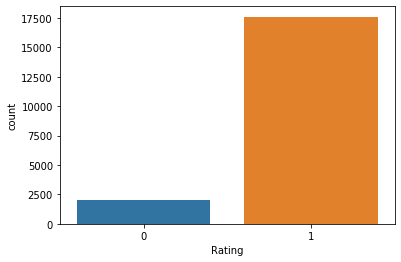

In [23]:
sns.countplot(x = sentiments)

In [24]:
X = df['Review Text']
y = df['Rating']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
print(X_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(13173, 17147)
(6489, 17147)
(13173,)
(6489,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
X_train = vectorizer.transform(X_train)
# print(vectorizer.get_feature_names())

In [28]:
X_test = vectorizer.transform(X_test)
# print(vectorizer.get_feature_names())

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logmodel.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
logmodel.score(X_test,y_test)

0.6124210201880105

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [34]:
clf = GaussianNB()
clf.fit(X_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
clf.score(X_test.toarray(),y_test)

0.25443057481892434

In [36]:
clf1 = MultinomialNB()
clf1.fit(X_train.toarray(),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
clf1.score(X_test.toarray(),y_test)

0.6212051163507474

In [38]:
X1 = df['Review Text']
y1 = sentiments

In [39]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=101)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [41]:
X1_train = vectorizer.transform(X1_train)

In [42]:
X1_test = vectorizer.transform(X1_test)

In [43]:
logmodel1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
logmodel1.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions1 = logmodel1.predict(X1_test)

In [45]:
logmodel1.score(X1_test,y1_test)

0.9055324395130221

In [46]:
clf01 = GaussianNB()
clf01.fit(X1_train.toarray(),y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
clf01.score(X1_test.toarray(),y1_test)

0.6171983356449375

In [48]:
clf11 = MultinomialNB()
clf11.fit(X1_train.toarray(),y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
clf11.score(X1_test.toarray(),y1_test)

0.9073817229157035

In [43]:
type(x)

NameError: name 'x' is not defined

In [ ]:
type(xx)

In [ ]:
x.shape

In [ ]:
xx = x.toarray()

In [ ]:
xx.shape

In [ ]:
df['Title'] = x

In [44]:
# there is difference between x and x.toarray()